In [1]:
%pwd

u'/home/ubuntu/nbs'

In [3]:
from theano.sandbox import cuda
import os, sys
current_dir = os.getcwd()
nb_dir = current_dir
data_dir = current_dir + '/data/plankton/'

In [6]:
from glob import glob
import numpy as np
import PIL
from PIL import Image
from PIL import ImageOps
from tqdm import tqdm
import bcolz
from utils import *
%matplotlib inline

Using Theano backend.


In [7]:
%cd $data_dir/train

/home/ubuntu/nbs/data/plankton/train


In [8]:
# Save the list of folders.
directory_names = os.listdir(data_dir+"train")

In [11]:
# The number of categries we are supposed to classify...
print("There are {} folders.").format(len(directory_names))

There are 121 folders.


In [14]:
numberofImages = 0
for folder in directory_names:
    for fileNameDir in os.walk(os.path.join(data_dir+"train", folder)):
        for fileName in fileNameDir[2]:
             # Only read in the images
            if fileName[-4:] != ".jpg":
              continue
            numberofImages += 1

print("There are a total of {} training images").format(numberofImages)

There are a total of 30336 training images


/home/ubuntu/nbs/data/plankton/train/copepod_calanoid_large/102545.jpg


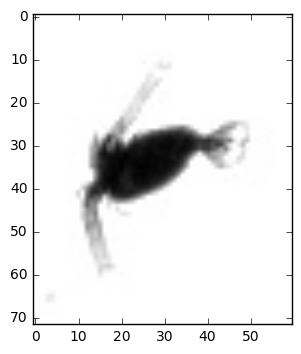

/home/ubuntu/nbs/data/plankton/train/ctenophore_lobate/143717.jpg


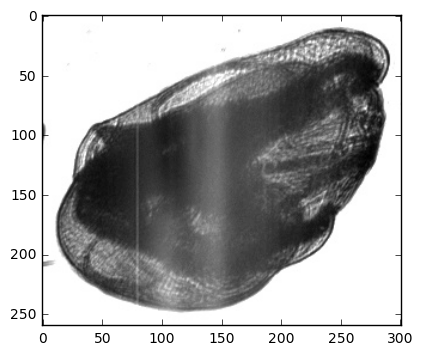

/home/ubuntu/nbs/data/plankton/train/hydromedusae_typeD/134968.jpg


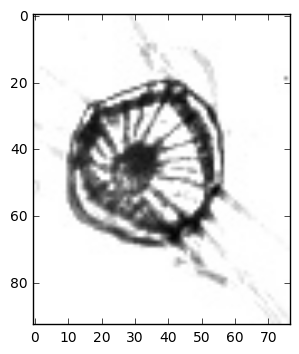

/home/ubuntu/nbs/data/plankton/train/hydromedusae_sideview_big/52837.jpg


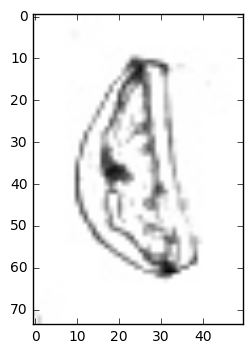

/home/ubuntu/nbs/data/plankton/train/invertebrate_larvae_other_A/76795.jpg


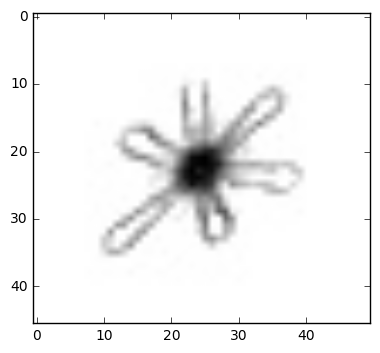

In [15]:
# Below are a couple of images from the training set
import glob
from pylab import cm

# A very important thing to note is that the sizes of each image
# is varying.
for i in xrange(5):
    example_file = glob.glob(os.path.join(data_dir+"train", directory_names[i],'*.jpg'))[8]
    im = imread(example_file)
    plt.imshow(im, cmap=cm.gray)
    print(example_file)
    plt.show()

In [16]:
# The next step would be to to seperate validation data and plot it...
# We create a folder that contains validation data...
%mkdir ../valid

# We create the same folders from the training data within the validation data
for d in directory_names:
    os.mkdir('../valid/'+d)

In [20]:
cd ../train/

/home/ubuntu/nbs/data/plankton/train


In [21]:
g = glob.glob('*/*.jpg')

In [22]:
shuf = np.random.permutation(g)
shuf[0]

'appendicularian_slight_curve/44253.jpg'

In [23]:
len(shuf)

30336

In [24]:
# Moving about 6000 images from training to validation...
for i in range(6067):
    os.rename(shuf[i], data_dir+'valid/'+shuf[i])

In [26]:
numberofImages = 0
for folder in directory_names:
    for fileNameDir in os.walk(os.path.join(data_dir+"valid", folder)):
        for fileName in fileNameDir[2]:
             # Only read in the images
            if fileName[-4:] != ".jpg":
              continue
            numberofImages += 1

print(numberofImages)

6067


In [27]:
(val_classes, trn_classes, val_labels, trn_labels, val_filenames, filenames, test_filenames) = get_classes(data_dir)

Found 24269 images belonging to 121 classes.
Found 6067 images belonging to 121 classes.
Found 130400 images belonging to 1 classes.


In [36]:
sizes = [PIL.Image.open(data_dir+"train/"+f).size for f in filenames]
val_sizes = [PIL.Image.open(data_dir+"valid/"+f).size for f in val_filenames]


# out of ~ 24000 images, there are 8566 unique image sizes.
import collections
# There are 8519 unique image sizes in the training set...
print(len(collections.Counter(sizes)))
# There are 3356 unique image sizes in the validation set...
print(len(collections.Counter(val_sizes)))

8519
3356


In [37]:
# I have already transferred files into appropriate directories.
def resize_save_image(image_path):
    # Opening image and retrieving its array
    image_array = np.asarray(Image.open(image_path))
    
    image_shape = image_array.shape
    
    # determining the padding of images so that they are all the same size...
    if image_shape[0] > image_shape[1]:
        padH = int((image_shape[0] - image_shape[0]) / 2)
        padV = 0
        
    if image_shape[1] > image_shape[0]:
        padH = 0
        padV = int((image_shape[1] - image_shape[0]) / 2)
    
    if image_shape[1] == image_shape[0]:
        padH = 0
        padV = 0
    
    padded_array = np.pad(image_array, ((padV, padV), (padH, padH)), mode='constant', constant_values=255)
    
    # The array is converted back to an image
    img = Image.fromarray(padded_array, 'L')
    
    # The image is resized to a square.
    square = (np.max(image_array.shape))
    img = img.resize((square, square))
    
    img.save(image_path)

In [39]:
for folder in directory_names:
    os.chdir(data_dir+'train/'+folder)
    g = glob.glob('*.jpg')
    for image_path in g:
        resize_save_image(image_path)

/home/ubuntu/nbs/data/plankton/train/copepod_calanoid_large/122348.jpg


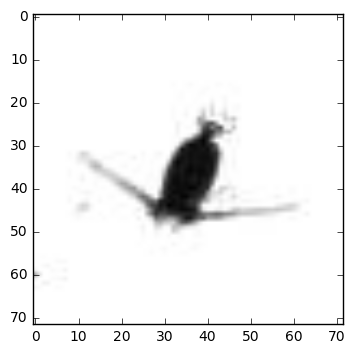

/home/ubuntu/nbs/data/plankton/train/ctenophore_lobate/143717.jpg


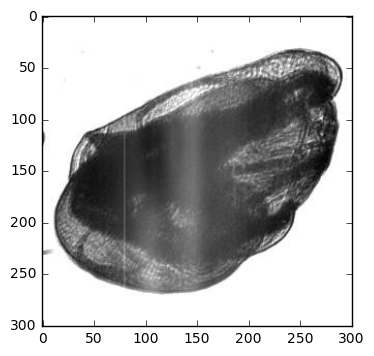

/home/ubuntu/nbs/data/plankton/train/hydromedusae_typeD/76034.jpg


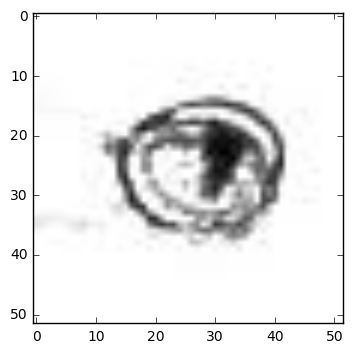

/home/ubuntu/nbs/data/plankton/train/hydromedusae_sideview_big/115841.jpg


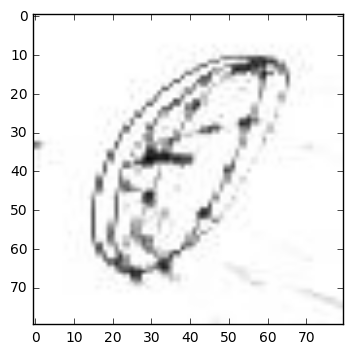

/home/ubuntu/nbs/data/plankton/train/invertebrate_larvae_other_A/30379.jpg


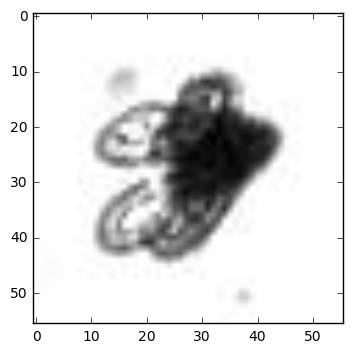

In [41]:
# import glob
from skimage.io import imread, imshow
from pylab import cm
from matplotlib import pyplot as plt
# Joining the path so 

for i in xrange(5):
    example_file = glob.glob(os.path.join(data_dir+"train", directory_names[i],'*.jpg'))[8]
    im = imread(example_file)
    plt.imshow(im, cmap=cm.gray)
    print(example_file)
    plt.show()

In [42]:
# Resizing the validation images
for folder in directory_names:
    os.chdir(data_dir+'valid/'+folder)
    g = glob.glob('*.jpg')
    for image_path in g:
        resize_save_image(image_path)

/home/ubuntu/nbs/data/plankton/valid/copepod_calanoid_large/102545.jpg


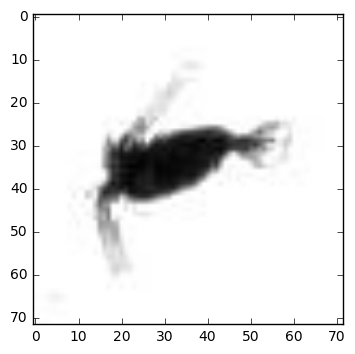

/home/ubuntu/nbs/data/plankton/valid/ctenophore_lobate/152136.jpg


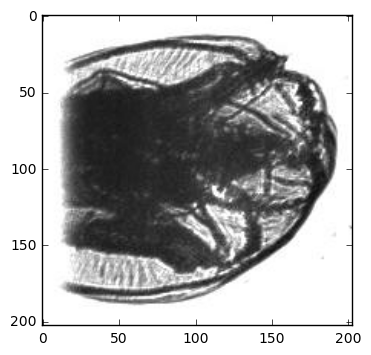

/home/ubuntu/nbs/data/plankton/valid/hydromedusae_typeD/16278.jpg


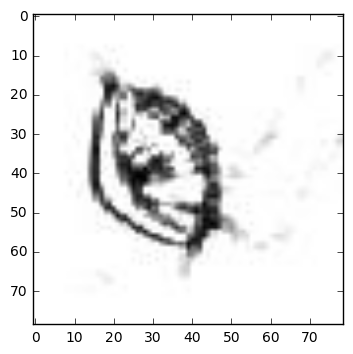

/home/ubuntu/nbs/data/plankton/valid/hydromedusae_sideview_big/85086.jpg


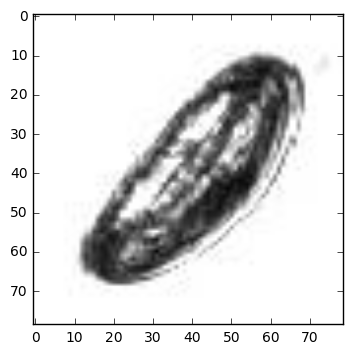

/home/ubuntu/nbs/data/plankton/valid/invertebrate_larvae_other_A/99514.jpg


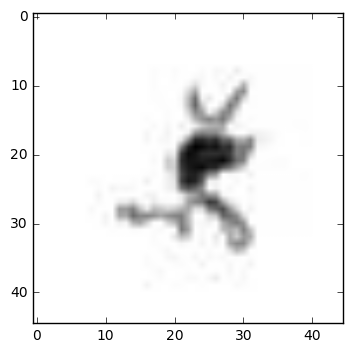

In [45]:
import glob
from skimage.io import imread, imshow
from pylab import cm
from matplotlib import pyplot as plt
# Joining the path so 

for i in xrange(5):
    example_file = glob.glob(os.path.join(data_dir+"valid", directory_names[i],'*.jpg'))[2]
    im = imread(example_file)
    plt.imshow(im, cmap=cm.gray)
    print(example_file)
    plt.show()

In [46]:
# Resizing testing images...
# for folder in folders:
os.chdir(data_dir+'test/test/')
g = glob.glob('*.jpg')
for image_path in g:
    resize_save_image(image_path)

In [50]:
print(len(trn_labels[1]))

121


In [51]:
def get_batches_custom(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4,color_mode="grayscale", class_mode='categorical',
                target_size=(128,128)):
    return gen.flow_from_directory(dirname, target_size=target_size,color_mode=color_mode,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [52]:
def get_data_custom(path, target_size=(128, 128)):
    batches = get_batches_custom(path, shuffle=False, batch_size=1,color_mode="grayscale", class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.nb_sample)])

In [54]:
gen = image.ImageDataGenerator(rescale=1./255)

In [55]:
# Data Parameters
img_rows, img_cols = 128, 128
in_shape = (img_rows, img_cols)
batch_size = 64
nb_classes = 121

In [56]:
train_batches = get_batches_custom(data_dir+"train", batch_size=batch_size, color_mode="grayscale", gen=gen)
valid_batches = get_batches_custom(data_dir+"valid", batch_size=batch_size, color_mode="grayscale", gen=gen)

Found 24269 images belonging to 121 classes.
Found 6067 images belonging to 121 classes.


In [57]:
def get_model():
    model = Sequential([
        Convolution2D(64,3,3, border_mode='same', activation='relu', input_shape=(1, img_rows, img_cols)),
        Convolution2D(64,3,3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Convolution2D(128,3,3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Convolution2D(256,3,3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(2048, activation='relu'),
        Dense(2048, activation='relu'),
        Dense(2048, activation='relu'),
        Dense(nb_classes, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [58]:
model = get_model()

In [59]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 64, 128, 128)  640         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 64, 128, 128)  36928       convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 64, 64, 64)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
convolution2d_3 (Convolution2D)  (None, 128, 64, 64)   73856       maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [61]:
# Running our first model for 3 epochs...
# Our best result in the first 3 epochs itself is already at 55%.
model.fit_generator(train_batches, train_batches.N, nb_epoch=3, validation_data=valid_batches, nb_val_samples=valid_batches.N)

Epoch 1/3
24269/24269 [==============================] - 250s - loss: 3.3079 - acc: 0.2184 - val_loss: 2.1891 - val_acc: 0.4083
Epoch 2/3
24269/24269 [==============================] - 250s - loss: 1.8700 - acc: 0.4767 - val_loss: 1.7648 - val_acc: 0.4900
Epoch 3/3
24269/24269 [==============================] - 249s - loss: 1.4191 - acc: 0.5796 - val_loss: 1.5856 - val_acc: 0.5517


In [62]:
model.save_weights(data_dir+'models/model_one_1e-3.h5')

In [64]:
# Decreasing the learning rate....
model.optimizer.lr = 1e-5
model.fit_generator(train_batches, train_batches.N, nb_epoch=3, validation_data=valid_batches, nb_val_samples=valid_batches.N)

Epoch 1/3
24269/24269 [==============================] - 248s - loss: 1.1194 - acc: 0.6536 - val_loss: 1.7298 - val_acc: 0.5537
Epoch 2/3
24269/24269 [==============================] - 249s - loss: 0.8721 - acc: 0.7189 - val_loss: 1.7256 - val_acc: 0.5756
Epoch 3/3
24269/24269 [==============================] - 249s - loss: 0.6412 - acc: 0.7854 - val_loss: 1.9863 - val_acc: 0.5761


In [8]:
(val_classes, trn_classes, val_labels, trn_labels, val_filenames, filenames, test_filenames) = get_classes(data_dir)

Found 24269 images belonging to 121 classes.
Found 6067 images belonging to 121 classes.
Found 130400 images belonging to 1 classes.


In [41]:
print(trn_classes[0])
print(trn_labels[1])

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [17]:
sizes = [PIL.Image.open(data_dir+"train/"+f).size for f in val_filenames]

# out of ~ 24000 images, there are 365 unique image sizes.
import collections
len(collections.Counter(sizes))

298

In [25]:
def get_batches_custom(dirname, gen=image.ImageDataGenerator(), shuffle=True, batch_size=4,color_mode="grayscale", class_mode='categorical',
                target_size=(128,128)):
    return gen.flow_from_directory(dirname, target_size=target_size,color_mode=color_mode,
            class_mode=class_mode, shuffle=shuffle, batch_size=batch_size)

In [26]:
def get_data_custom(path, target_size=(128, 128)):
    batches = get_batches_custom(path, shuffle=False, batch_size=1,color_mode="grayscale", class_mode=None, target_size=target_size)
    return np.concatenate([batches.next() for i in range(batches.nb_sample)])

In [27]:
val = get_data_custom(data_dir+'valid', target_size=(128,128))

Found 6067 images belonging to 121 classes.


In [30]:
val.shape

(6067, 1, 128, 128)

In [33]:
# saving the validation array
save_array(data_dir+'arrays/val_bw.bc', val)

In [31]:
trn = get_data_custom(data_dir+'train', target_size=(128,128))

Found 24269 images belonging to 121 classes.


In [32]:
trn.shape

(24269, 1, 128, 128)

In [34]:
save_array(data_dir+'arrays/trn_bw.bc', trn)

In [35]:
# Lets run a neural network...
img_rows, img_cols = 128, 128
in_shape = (img_rows, img_cols)
batch_size = 64
nb_classes = 121

In [36]:
def get_model():
    model = Sequential([
        Convolution2D(64,3,3, border_mode='same', activation='relu', input_shape=(1, img_rows, img_cols)),
        Convolution2D(64,3,3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Convolution2D(128,3,3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Convolution2D(256,3,3, border_mode='same', activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(2048, activation='relu'),
        Dense(2048, activation='relu'),
        Dense(2048, activation='relu'),
        Dense(nb_classes, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
model = get_model()

In [42]:
gen = image.ImageDataGenerator(rescale=1./255)

In [44]:
train_batches = get_batches_custom(data_dir+"train", batch_size=batch_size, color_mode="grayscale", gen=gen)
val_batches = get_batches_custom(data_dir+"valid", batch_size=batch_size, color_mode="grayscale", gen=gen)

Found 24269 images belonging to 121 classes.
Found 6067 images belonging to 121 classes.


In [ ]:
model.fit_generator(train_batches, train_batches.N, nb_epoch=2, validation_data=val_batches, nb_val_samples=val_batches.N)

Epoch 1/2
 8128/24269 [=========>....................] - ETA: 154s - loss: 15.7572 - acc: 0.0224